Treść algorytmu:
    1. x = początkowa wartość losowo wybrana z przedziału zakres_zmienności,
    2. y = wartość funkcji przystosowania (tutaj sin(x/10.0).*sin(x./200)),
    3. wykonaj pętlę l_iteracji razy
        1. xpot = x + zmienna losowa z przedziału [-rozrzut; +rozrzut],
        2. jeśli wartość parametru xpot przekroczyła dozwolony przedział (zakres_zmienności) należy go skorygować wybraną przez siebie metodą.
        3. ypot = funkcja przystosowania dla xpot ,
        4. jeśli uzyskano nie gorszy wynik (ypot >= y)
            1. zastąp stare wartości nowymi (x = xpot; y = ypot)
            2. zwiększ rozrzut o wsp_przyrostu (rozrzut *= wsp_przyrostu)
        5. jeśli uzyskano gorszy wynik (ypot < y)
            1. zmniejsz rozrzut o wsp_przyrostu (rozrzut /= wsp_przyrostu)

Raport dot. alg. 1+1
1. Proszę wylosować wartość x, rozrzut=10 z przedziału dostępności, następnie pokazać jak zmieniają się na początku, po 5, po 10 i po 15 wartości: x (nie xpot ) , y
2. Proszę wylosować inną wartość x z przedziału dostępności, rozrzut=10, następnie pokazać jak zmieniają się na początku i po kolejnych 20 krokach wartości:  y, rozrzut.
3. Proszę jako wartość początkową wylosować liczbę z przedziału [15;35] i rozrzut 5, zakres dostępny zmian wartości x jest bez zmian. Proszę następnie pokazać jak zmieniają się na początku i po kolejnych 20 krokach wartości:  x, y.

In [193]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [194]:
def funkcja(x):
    return float(np.sin(x/10) * np.sin(x/200))

In [195]:
rozrzut = 10
wsp_przyrostu=1.1
l_iteracji=100

In [196]:
x = randint(0, 100)
y = funkcja(x)
x_points = [x]
y_points = [y]
dispersions = [rozrzut]
for l in range(l_iteracji):
    random_number = randint(int(-rozrzut), int(rozrzut))
    xpot = x + random_number
    if xpot<0:
        xpot = 0
    if xpot>100:
        xpot=100
    ypot = funkcja(xpot)
    if ypot >= y:
        x = xpot
        y = ypot
        x_points.append(x)
        y_points.append(y)
        rozrzut *= wsp_przyrostu
    if ypot < y:
        rozrzut /= wsp_przyrostu
    dispersions.append(rozrzut)
    
    x_range = np.arange(0, 100, 0.1)
    y = np.sin(x_range/10) * np.sin(x_range/200)
    idx = np.arange(0, 20, 1)
    
    plt.plot(x_range, y, label='funkcja')
    report_points_x = [x_points[i] for i in idx]
    report_points_y = [y_points[i] for i in idx]
    idx = np.arange(1, 20, 1)
    report_dispersions = [dispersions[i] for i in idx]
    
    plt.plot([x-dispersions[0], x_points[0]-dispersions[0]], [y[0],y[0]], color='r', label='rozrzut')
    for x, y, dispersion in zip(report_points_x, report_points_y, report_dispersions):
        plt.plot([x-dispersion, x+dispersion], [y,y], color='r')
    
    plt.plot(report_points_x, report_points_y, 'o', label='punkt')
    plt.title()
    plt.legend()
    plt.show()

numer iteracji: 0
x: 39
y: -0.1332660655294921
rozrzut: 11.0


numer iteracji: 1
x: 39
y: -0.1332660655294921
rozrzut: 10.0


numer iteracji: 2
x: 39
y: -0.1332660655294921
rozrzut: 9.09090909090909


numer iteracji: 3
x: 39
y: -0.1332660655294921
rozrzut: 8.264462809917354


numer iteracji: 4
x: 35
y: -0.061074214472110026
rozrzut: 9.09090909090909


numer iteracji: 5
x: 35
y: -0.061074214472110026
rozrzut: 8.264462809917354


numer iteracji: 6
x: 35
y: -0.061074214472110026
rozrzut: 7.513148009015776


numer iteracji: 7
x: 33
y: -0.025910097966739983
rozrzut: 8.264462809917354


numer iteracji: 8
x: 25
y: 0.07461435500464633
rozrzut: 9.09090909090909


numer iteracji: 9
x: 25
y: 0.07461435500464633
rozrzut: 8.264462809917354


numer iteracji: 10
x: 17
y: 0.08419004452411169
rozrzut: 9.09090909090909


numer iteracji: 11
x: 17
y: 0.08419004452411169
rozrzut: 8.264462809917354


numer iteracji: 12
x: 17
y: 0.08419004452411169
rozrzut: 7.513148009015776


numer iteracji: 13
x: 19
y: 0.0

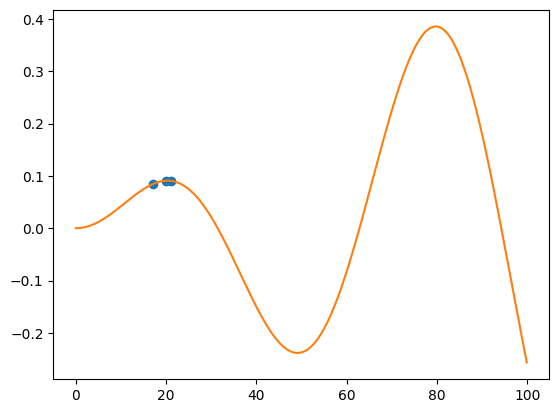

In [197]:
x_range = np.arange(0, 100, 0.1)
y = np.sin(x_range/10) * np.sin(x_range/200)
idx = [5, 10, 15]
report_points_x = [x_points[i] for i in idx]
report_points_y = [y_points[i] for i in idx]
plt.plot(report_points_x, report_points_y, 'o')
plt.plot(x_range, y)

plt.show()

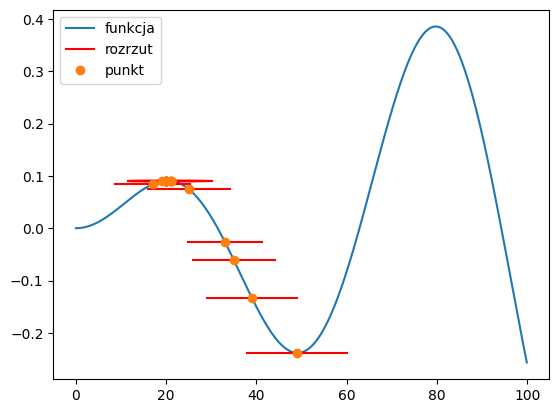

In [226]:
x_range = np.arange(0, 100, 0.1)
y = np.sin(x_range/10) * np.sin(x_range/200)
idx = np.arange(0, 20, 1)

plt.plot(x_range, y, label='funkcja')
report_points_x = [x_points[i] for i in idx]
report_points_y = [y_points[i] for i in idx]
idx = np.arange(1, 20, 1)
report_dispersions = [dispersions[i] for i in idx]
plt.plot([x_points[0]-dispersions[0], x_points[0]+dispersions[0]], [y[0],y[0]], color='r', label='rozrzut')
for x, y, dispersion in zip(report_points_x, report_points_y, report_dispersions):
    plt.plot([x-dispersion, x+dispersion], [y,y], color='r')

plt.plot(report_points_x, report_points_y, 'o', label='punkt')
plt.legend()
plt.show()

In [198]:
for i in range(20):
    print(f"krok: {i}, y: {y_points[i]}, rozrzut: {dispersions[i]}\n")

krok: 0, y: -0.23830009499708876, rozrzut: 10

krok: 1, y: -0.1332660655294921, rozrzut: 11.0

krok: 2, y: -0.061074214472110026, rozrzut: 10.0

krok: 3, y: -0.025910097966739983, rozrzut: 9.09090909090909

krok: 4, y: 0.07461435500464633, rozrzut: 8.264462809917354

krok: 5, y: 0.08419004452411169, rozrzut: 9.09090909090909

krok: 6, y: 0.08976334699666144, rozrzut: 8.264462809917354

krok: 7, y: 0.09047052982504122, rozrzut: 7.513148009015776

krok: 8, y: 0.09047052982504122, rozrzut: 8.264462809917354

krok: 9, y: 0.09047052982504122, rozrzut: 9.09090909090909

krok: 10, y: 0.09047052982504122, rozrzut: 8.264462809917354

krok: 11, y: 0.09077826886817701, rozrzut: 9.09090909090909

krok: 12, y: 0.09077826886817701, rozrzut: 8.264462809917354

krok: 13, y: 0.09077826886817701, rozrzut: 7.513148009015776

krok: 14, y: 0.09077826886817701, rozrzut: 8.264462809917354

krok: 15, y: 0.09077826886817701, rozrzut: 7.513148009015776

krok: 16, y: 0.09077826886817701, rozrzut: 6.8301345536507

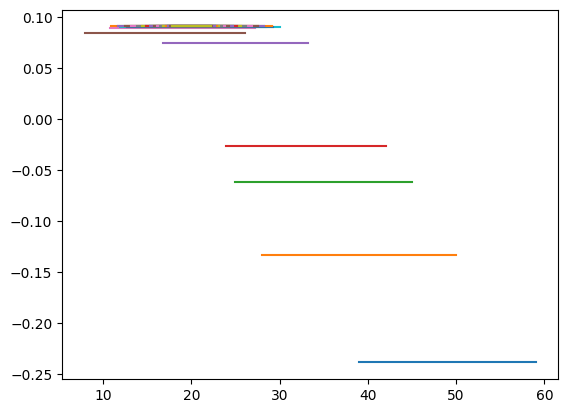

In [209]:
for x, y, dispersion in zip(x_points, y_points, dispersions):
    plt.plot([x-dispersion, x+dispersion], [y,y])